Problem Statement:

Predict the salary if the employee using the features provided in the data.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About the columns

Discipline:
    This Column shows the grade of discipline of employees.

yrs.since.phd:
    This column shows the No.of years since phd of employees.
    
yrs.service:
    The years of service is shown in this column.
    
Sex:
   Gender of the employees is given in this column.
   
Salary:
   It shows the salary of the employees.
    

In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

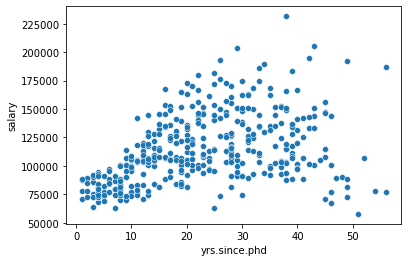

In [7]:
import seaborn as sns
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

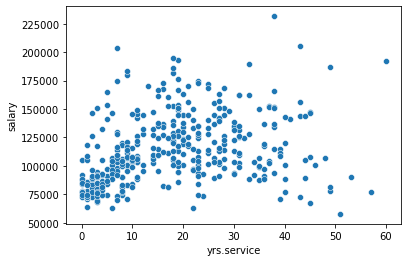

In [8]:
import seaborn as sns
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

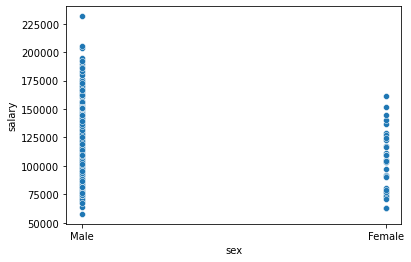

In [10]:
import seaborn as sns
sns.scatterplot(x="sex",y="salary",data=df)


<AxesSubplot:xlabel='rank', ylabel='salary'>

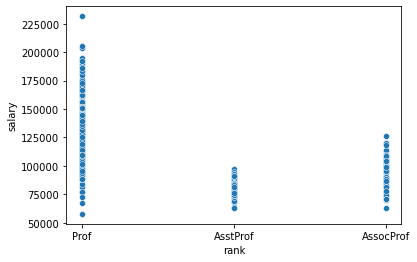

In [19]:
import seaborn as sns
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

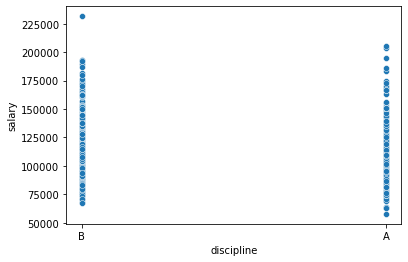

In [20]:
import seaborn as sns
sns.scatterplot(x="discipline",y="salary",data=df)

# Correlation:

In [21]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


# Correlation using Heatmap:

<AxesSubplot:>

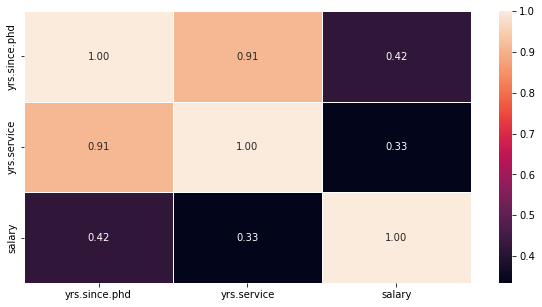

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Describing Datasets:

In [25]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


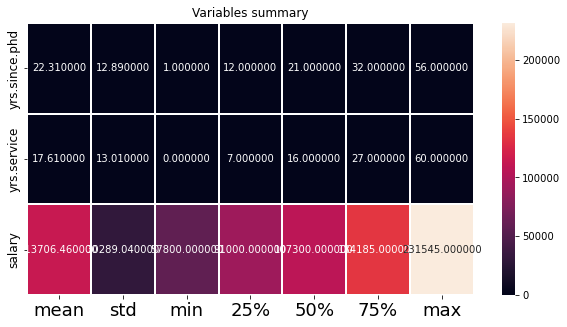

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Outcome of describe of datasets:

From the above plotting we are determining mean,stadard deviation,minimum and maximum value of each column.It helps us further in data cleaning.

Total No.of rows in the dataset:

397

Total No.of columns in the dataset:

6

yrs.since.phd:

1.Mean = 22.314861

2.std =  12.887003

3.max_value = 56.000000

4.min_value = 1.000000

yrs.service:

1.Mean = 17.614610

2.std = 13.006024

3.max_value = 60.000000

4.min_value = 0.000000

Salary:

1.Mean = 113706.458438

2.std = 30289.038695

3.max_value = 231545.000000

4.min_value = 57800.000000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers Checking:

<AxesSubplot:>

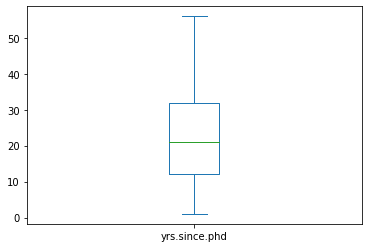

In [32]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

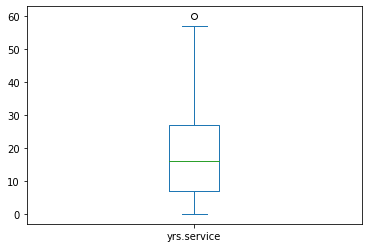

In [33]:
df['yrs.service'].plot.box()

<AxesSubplot:>

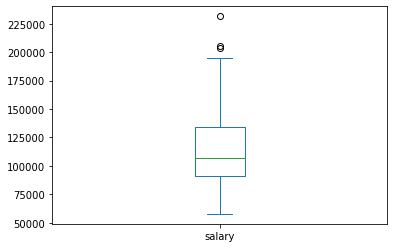

In [34]:
df['salary'].plot.box()

# Skewness:

In [35]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Outcome of Skewness:

Skewness threshold is taken as +/-0.5.

# Normal Distribution Curve:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

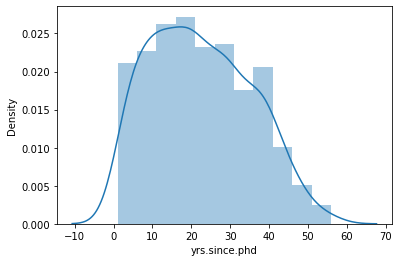

In [36]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

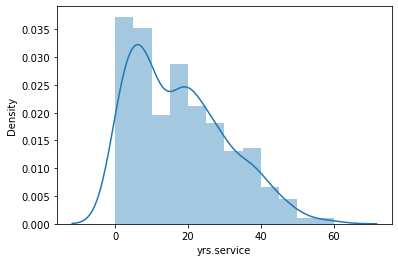

In [37]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

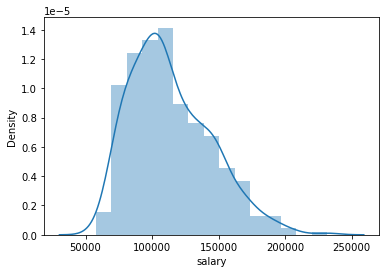

In [38]:
sns.distplot(df["salary"])

In [40]:
df1=df.drop(['rank','discipline','sex'],axis=1)
df1

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


# Removing Outliers:

Z-score Technique

In [41]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(397, 3)

In [42]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [43]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(397, 3)
(393, 3)


# Percentage Data Loss:

In [45]:
loss_percent=(397-393)/397*100
loss_percent

1.0075566750629723

In [46]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [47]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [50]:
lr=LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state",i)
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 176 The model performs very well
At random state 176
Training r2_score is: 20.966050070785634
Testing r2_score is: 21.03925080204868
At random state 316 The model performs very well
At random state 316
Training r2_score is: 21.271411294883325
Testing r2_score is: 21.313198797435184
At random state 317 The model performs very well
At random state 317
Training r2_score is: 20.8548980747718
Testing r2_score is: 20.86017997453008
At random state 984 The model performs very well
At random state 984
Training r2_score is: 21.06354325122213
Testing r2_score is: 21.143375851198353


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=106)

# Cross validation score for linear regression:

In [52]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred_lr)
for j in range(2,10):
    lsscore =cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:",j)
    print("cross validation score: ",lsc*100)
    print("r2_score: ",lss*100)
    print("\n")

At cv: 2
cross validation score:  17.54910966641251
r2_score:  19.40189975236025


At cv: 3
cross validation score:  18.962452375457207
r2_score:  19.40189975236025


At cv: 4
cross validation score:  19.03757152136178
r2_score:  19.40189975236025


At cv: 5
cross validation score:  16.95702140698651
r2_score:  19.40189975236025


At cv: 6
cross validation score:  18.199940538873136
r2_score:  19.40189975236025


At cv: 7
cross validation score:  15.69237767062653
r2_score:  19.40189975236025


At cv: 8
cross validation score:  18.13844636229376
r2_score:  19.40189975236025


At cv: 9
cross validation score:  12.873730666944283
r2_score:  19.40189975236025




In [53]:
lsscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is:",lss)

The cv score is:  0.1903757152136178 
The accuracy score is: 0.19401899752360252


# Model Saving:

In [ ]:
import pickle
filename= 'salary_model.pkl'
pickle.dump(lr,open(filename,'wb'))